
### <img style="float: left; padding-right: 10px; width: 45px" src="https://upload.wikimedia.org/wikipedia/en/8/89/ExtensionFlag.png"> CSCI E-90 Cloud Services, Infrastructure and Computing

# Final Project

**Student Name: Adam Brzozowski**

**Harvard University**<br/>
**Fall 2023**<br/>
**Instructors**: Gregory Misicko \
**Teaching Fellows** Anthony Bunker | Sergei Kovalenko | Marina Popova | Hector Saint-Hilaire


<hr style="height:2pt">

# YouTube Video Links (Post Video Production)

To watch my full video talk on this project, please click on the following link:
[Full Video](https://youtu.be/n3eTNqOoFw0)

https://youtu.be/n3eTNqOoFw0

To watch my short video talk on this project, in which I only introduce the concept, please click on the following link:
[Short Video](https://youtu.be/0p_IIMZhkQA)

https://youtu.be/0p_IIMZhkQA

# GitHub Link (Post Production)


Please click this link to navigate to the GitHub repository page for the public artifacts for this project: [GitHub Adam Brzozowski Showcase Repo](https://github.com/brzozowskia/adam_brzozowski_showcase)

https://github.com/brzozowskia/adam_brzozowski_showcase

# Introduction

One of the key challenges in data science is often gaining access to authorized, accessible, secure, and relevant infrastructure to perform modeling tasks. The majority of modeling tasks make use of core transactional data at most companies. In theory, these environments should be relatively manageable from a compliance and access standpoint within most industries; granted, the requisite compute and storage infrastructure may not be up to the task in an on-premise environment. 

However, within some industries, such as healthcare and life sciences, data lifecycles are typically defined within access windows based on the governance tied to particular data sets. Data governed through access by an Institutional Review Board (IRB) is subject to stringent privacy and security requirements, as well as a defined data lifecycle in which copies of all project data must be destroyed at the conclusion of a project to document successful termination of access. 

In this context all infrastructure and data access is inherently bespoke. What is needed by the data scientist is a familiar and simple way to interact with infrastructure on AWS in order to stand up repeatable, bespoke environments. The AWS SDK offers us just such a mechanism.

The setup for the project is presented inside of a Jupyter notebook running on my local machine - which is a preferred type of environment for a data scientist. The project would still be relevant from a web based Jupyter notebook hosted in a cloud based environment as well. As such, this project should have direct relevance vis a vis the usual preference set / requirements of the data scientist.

## Useful Training Context

In general, I found that navigating the AWS documentation was challenging. While knowledge of Python was helpful for that journey, I found it very valuable to already have the cloud infrastructure concepts of the core AWS services under my belt before beginning. I would like to extend a special thank you to Gregory Misicko and his entire teaching fellow staff for the education they provided me with this semester.

## Libraries and utility functions

Below, I import libraries needed for the project - only a handful were really necessary - and define some utility functions to make the code easier to work with:


*Database record commit utility - commit_record()*

After working with the pandas sqlite API, I found the interface heavier than I wanted compared to simply committing the records directly for incremental commits. Below, a function is defined to commit a new record to the database. For function documentation, I used the autoDocstring - Python Docstring Generator by Nils Werner from the Visual Studio Code extensions marketplace.

*Read database results read_db_results()*

I also found it expedient to create a utility function for reading results out of the db quickly

*Restore IAC variables to python environment*

In true modular fashion, I built a function that would put all of the variables from read_db_results() into the global environment without any manual assignment. It's only necessary to call this utility function because it calls read_db_results().

*Delete record utility*

The delete_record() utility deletes a field from the IAC database to enable it to be redone

In [1]:
from IPython import display
import boto3


def commit_record(field_name, field_value, database="configs.db", table_name="configs"):
    #was very useful for setting this up
    #https://www.geeksforgeeks.org/python-sqlite-insert-data/
    """Function creates a new entry in the configs sqlite database
    Args:
        field_name (_type_): the name of the field being committed to the db
        field_value (_type_): the value of the field being entered for the field name
        database (str, optional): the name of the sqlite database the function commits records to. Defaults to "configs.db".
        table_name (str, optional): the name of the table in the sqlite database where the record will be stored. Defaults to "configs".
    """
    st = f" insert into '{table_name}' (field, value) values ('{field_name}', '{field_value}' )"
    import sqlite3 
    conn = sqlite3.connect(database) 
    cursor = conn.cursor() 
    cursor.execute(st)
    conn.commit() 
    conn.close()


def read_db_results():
    """Reads results out of the project database for all committed data

    Returns:
        _type_: a dataframe of the existing configs
    """
    from pandas import read_sql 
    configs_out = read_sql("Select * from configs", "sqlite:///configs.db")
    return configs_out


def restore_global_iac_variables():
    # Method for declaring a variable using the exec function
    #https://plainenglish.io/blog/how-to-dynamically-declare-variables-inside-a-loop-in-python
    # Modifying global variables is dangerous but possible in Python from a function
    # https://stackoverflow.com/questions/41100196/exec-not-working-inside-function-python3-x
    
    """_summary_ Reads in all variables from the IAC variables sqlite database 
    into the global environment to enable work to be done over multiple days"""
    for row, value in read_db_results().iterrows():
        exec(f"{value.iloc[0]}='{value.iloc[1]}'", locals(), globals())


def delete_record(field_name, database="configs.db", table_name="configs"):
    #was very useful for setting this up
    #https://www.geeksforgeeks.org/python-sqlite-insert-data/
    """Function deletes an entry in the configs sqlite database
    Args:
        field_name (_type_): the name of the field being deleted from the db
        database (str, optional): the name of the sqlite database the function deletes records from. Defaults to "configs.db".
        table_name (str, optional): the name of the table in the sqlite database where the record will be deleted from. Defaults to "configs".
    """
    st = f" delete from '{table_name}' where field = '{field_name}'"
    import sqlite3 
    conn = sqlite3.connect(database) 
    cursor = conn.cursor() 
    cursor.execute(st)
    conn.commit() 
    conn.close()
    
    
ec2 = boto3.client('ec2')

## Run for New VPC Only

If the workbook is being used to build up a new VPC, run the below code chunk. Otherwise, do not run this next code chunk:

In [2]:
import os 
new_vpc = True

if new_vpc and "configs.db" in os.listdir():
    #https://www.w3schools.com/python/python_file_remove.asp
    os.remove("configs.db")

### Unit test - return one of the variables in the db

Note that since this variable was declared inside of the function using the exec operation, rather than being declared above, the VS Code IDE will underline it to assert that it is referenced before declaration. 

In [3]:
if new_vpc != True:
    VpcId

### Unit test - confirm all IAC variables are in the global Python environment

First, the IAC variables will be printed out to show the undeclared variables I'm going to confirm the existence of:

In [4]:
if new_vpc != True:
    infra_db_vars = set(read_db_results()['field'])
    infra_db_vars

Next, a special property of the set operation in the Python builtins will be used to compare the set above against a set of all variables in the global environment that can be retireved via dir() to ensure that I have all of these pulled in. Since I are comparing from the infra_db_vars set TO the dir() set, it will only return any variables that are not in infra_db_vars.

In [5]:
if new_vpc != True:
    infra_db_vars.difference(dir())

# Python environment setup

Any python environment running on a computer should be built in an isolated virtual environment. Moreover, this environment should be part of the bespoke infrastructure as code repeatable pipeline. By scripting the setup for the local, as well as the remote, python environments, it becomes possible to remove a considerable amount of effort and uncertainty that stands in the way of delivering a secure work environment to support bespoke data science. Virtual environments are best deployed as conda environments through declarative yaml configuration files.

A printout of the local environment setup yaml anaconda configuration file, and associated environment is printed out below. The parts of the yaml configuration is : (1) the name of the environment to be set up - which can be different from the file name; (2) the channels from which Python packages will be sought and solved for - in order of preference. This preference can be overrided manually, if necessary under the last section; (3) dependencies - which lists the items to be installed. By specifying the version of python to be installed using an inequality, the package manager will have a range of options to solve for a fully consistent environment. Using conda instead of PIP can help ensure that dependencies are solved for across the entire environment, instead of sequentially. Having consistency at this level will better guarantee that conflicts between packages are avoided to the greatest degree possible.

In [6]:
with open('generic_aws_cli_env.yml', 'r', newline='\r') as file:
    for line in file:
        print(line)

name: generic_aws_cli_env
channels:
  - conda-forge
  - default
dependencies:
  - python>=3.11
  - numpy
  - pandas
  - pip
  - boto3
  - ipykernel
  - openpyxl
  - sqlalchemy
  - nbconvert


Below, the command to make use of this Python yaml script is presented. Python environments like this can be set up from any directory on the computer. Since this file is enclosed inside of the directory for the project, a setup command invoked in this directory will build the environment. The below command tells conda to create a new environment. The "-f" option from the printout above means to force the environment to say yes to all options during setup. Since I don't want to make use of an interactive terminal in the IDE, saying yes to all defaults automatically is required to run this command in the Jupyter cell. In general, this would be done the same way from the terminal so this is not a compromise in quality for the above set of dependencies. The last option is the name of the yaml file to be run. By putting the "!" character in front of the command, the bash terminal is invoked inside of the Jupyter notebook cell. Any results of the command from the terminal will then be displayed below the cell as the cell output - just as when using Python commands within a Jupyter notebook cell:

In [11]:
!conda env create -f generic_aws_cli_env.yml

Retrieving notices: ...working... done

CondaValueError: prefix already exists: /home/batman/anaconda3/envs/generic_aws_cli_env



The above result means that the environment has been successfully built. You might not see this result if your version of anaconda is out of date - in which case you can separately run commands from the terminal to upgrade your environment to the newest version the way you would ordinarily do so to perform maintenance on your package manager as a data scientist. If you don't have sufficient permissions to do this, you can always perform the environment setup using anaconda navigator - since the libraries used in this demo are available and supported within anaconda. The approach presented here is far more lightweight and fast compared to using the GUI. Moreover, in keeping with the overall spirit of this project, scripted command line approaches for building all infrastructure are also far more repeatable as well.

## AWS Configuration Step

First, it is necessary to install the awscli library for the operating system. On Ubuntu, that is the following command:

*sudo apt-get install awscli*

In order to work with boto3, I will need to provide AWS account credentials for a user that I have created which has command line interface (CLI) credentials. The best practice in this circumstance is to create a separate IAM user from the root account that has CLI access credentials. You will need to save the aws_access_key_id and aws_secret_access_key into a password manager as they are not downloadable again from the AWS console after creation. Once done, run the following terminal command:

*aws configure*

It will then prompt you for the aws_access_key_id and aws_secret_access_key , and then the default region (us-east-1 chosen in this case) and the output format to be used for response payloads from calls from the AWS library. In this case, none was chosen (json is used in some programs).

# Remote environment setup

For the remote environment, I need to define and accomplish some key goals for the infrastructure itself before it will be performant, secure, and full featured enough to be useful. To simplify this, a visual diagram of the proposed architecture, which was developed using [Lucidchart](https://lucid.app/lucidchart/271a1087-bf06-43f3-a0ba-6a6807b3907f/edit?beaconFlowId=10D149A4EDB74854&invitationId=inv_87ebd96a-e26f-4ad1-8221-b2fb91d58b75&page=0_0#) is presented below:

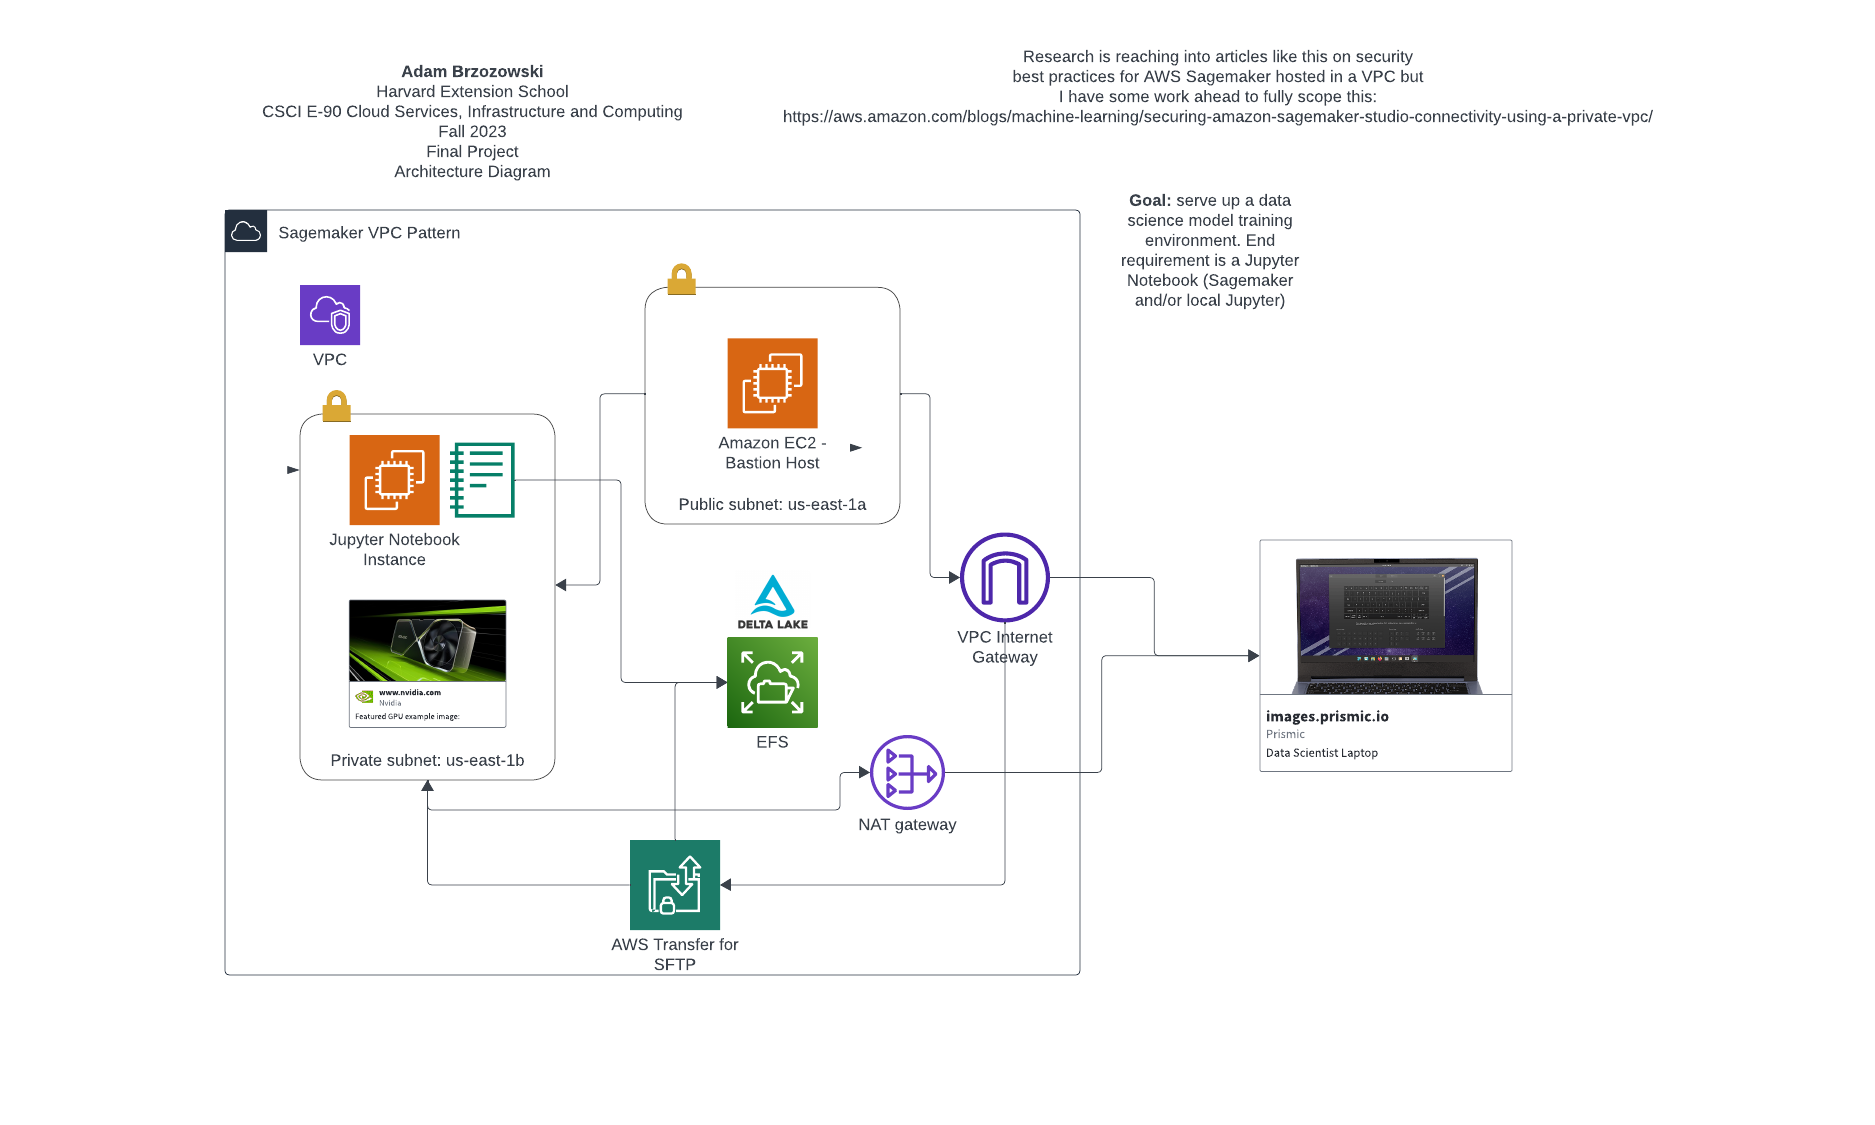

In [7]:
display.Image('https://lucid.app/publicSegments/view/0d706bde-f039-403d-a807-92ef2da9c724/image.png')

## Explanation

At a high level, the architecture will be a full featured environment designed to support a full lifecycle of a machine learning project. Computing will be provided by Amazon ec2 servers - ideally provisioned with a GPU for more intensive workloads (merely typically as difficult as a configuration option in boto3). Unlike a typical workflow for a project served off of a corporate transactional database, the data for a typical project is typically downloaded a single time and must be destroyed at the end of a project. Datasets can be several terabytes in size and contain incredibly sensitive data. Typically, the data will be have to be uploaded to the project servers using a secure file transfer point (sFTP) service. In an ideal world, data from the source server would be downloaded directly to the cloud service without any intermediate step - such as being downloaded first on a local machine. The source data would then need to be moved from the sFTP to a data lake for use in the project. Amazon offers AWS HealthLake - which I would seek to specify and provision programatically if possible. 

The model development lifecycle would ideally be handled by AWS Sagemaker - which is relatively full featured. A lower cost, but more demanding approach to the setup, would be to deploy a second ec2 that would be provisioned with an ML Flow server - which is what Sagemaker makes use of in terms of design pattern but also most likely as an underlying code base. ML Flow server would be used as a model registry, but also for inferencing. In scenarios where inferencing workloads are variable, scale out and scale in could potentially be orchestrated in some circumstances, but not all. As such, an AWS Serverless approach would be preferable from an operational excellence standpoint.

It is critical that none of the data in this setting be persisted in a publicly reachable host or dataset. All of the data should therefore only be reachable on a private subnet that can only be reached via a bastion host.

# AWS boto3 discussion

The AWS SDK utilizes the credentials provided to create a client with the AWS CLI using the boto3.client() method of the boto3 class. 

When I first began interacting with the AWS SDK, I was a bit puzzled at some of the references to VPCs in the AWS SDK. It seems that, perhaps due to the history of how AWS services evolved, with ec2 being one of the first services, the reference to VPC is actually nested within an ec2 object type of the boto3 client. With so much of custom computing revolving around ec2s, this seems like a useful note for anyone starting out on this type of IAC project.

In general, it is much easier to understand boto3 once you observe that much of the library follows a general form in which a client connection is made. Within that connection, methods of the connection follow a general form of "create_resourcetype." Next, various relevant functionality of AWS is exposed to the end user through optional arguments that can be passed to the function. Lastly, a mechanism to deploy tags is also generally provided for.

# Boto3 client

First, a boto3 client will be created to create the most important resources for this project:

In [8]:
# this link demonstrated how to form a connection
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/ec2-example-security-group.html
ec2 = boto3.client('ec2')

The next step is to create the VPC. There is an extensive set of options within the create_vpc command. Many of these options pertain to IP address pool allocation. These capabilities would be very useful in scenarios with large organizations with multiple AWS accounts that need to ensure that IP address ranges don't overlap. These options will not be necessary with a single AWS account configuration for an academic final project. It is also possible to specify whether the VPC will be within a shared tenancy environment - as is common for most cloud instances - or whether a dedicated tenancy is required (which could potentially be useful for highly regulated settings in which tenancy cannot be shared). Below, a VPC is created using the ec2 client connection instance from above. 

In [9]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_vpc.html#EC2.Client.create_vpc
response = ec2.create_vpc(
    CidrBlock='10.0.0.0/16',
    DryRun=False, # useful for testing purposes
    InstanceTenancy='default',
    TagSpecifications=[
        {
            'ResourceType':  'vpc',
            'Tags': [
                {
                    'Key': 'Name',
                    'Value': 'hes_e90_project'
                },
            ]
        },
    ]
)

I can see from the results of the cell operation above that the request to AWS was successfully fulfilled. The VPC name is programmatically extracted from the response payload above. The VPC ID is saved for subsequent use in further architectual changes to the new VPC.

In [10]:
vpc_metadata = response
vpc_metadata

{'Vpc': {'CidrBlock': '10.0.0.0/16',
  'DhcpOptionsId': 'dopt-0bb0509a8ecf25acb',
  'State': 'pending',
  'VpcId': 'vpc-09227df9104712079',
  'OwnerId': '505296053618',
  'InstanceTenancy': 'default',
  'Ipv6CidrBlockAssociationSet': [],
  'CidrBlockAssociationSet': [{'AssociationId': 'vpc-cidr-assoc-051662c6c4f211c33',
    'CidrBlock': '10.0.0.0/16',
    'CidrBlockState': {'State': 'associated'}}],
  'IsDefault': False,
  'Tags': [{'Key': 'Name', 'Value': 'hes_e90_project'}]},
 'ResponseMetadata': {'RequestId': '1eaf8b9e-4d18-44ef-981e-0be3f38eb5a2',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '1eaf8b9e-4d18-44ef-981e-0be3f38eb5a2',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '1067',
   'date': 'Sun, 17 Dec 2023 21:18:27 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

In [11]:
vpc_id_for_demo = vpc_metadata['Vpc']['VpcId']
vpc_id_for_demo

'vpc-09227df9104712079'

Next, consistent with the architectual plan, public and private subnets will be added to the VPC using the cached VPC ID from the previous step. Below, the public subnet is added first:

In [12]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_subnet.html#EC2.Client.create_subnet
response = ec2.create_subnet(
    TagSpecifications=[
        {
            'ResourceType': 'subnet',
            'Tags': [
                {
                    'Key': 'Name',
                    'Value': 'e90_final_public'
                },
            ]
        },
    ],
    AvailabilityZone='us-east-1a',
    CidrBlock='10.0.1.0/24',
    VpcId=vpc_id_for_demo,
    DryRun=False
)
response

{'Subnet': {'AvailabilityZone': 'us-east-1a',
  'AvailabilityZoneId': 'use1-az4',
  'AvailableIpAddressCount': 251,
  'CidrBlock': '10.0.1.0/24',
  'DefaultForAz': False,
  'MapPublicIpOnLaunch': False,
  'State': 'available',
  'SubnetId': 'subnet-097eeb8c19ed55f79',
  'VpcId': 'vpc-09227df9104712079',
  'OwnerId': '505296053618',
  'AssignIpv6AddressOnCreation': False,
  'Ipv6CidrBlockAssociationSet': [],
  'Tags': [{'Key': 'Name', 'Value': 'e90_final_public'}],
  'SubnetArn': 'arn:aws:ec2:us-east-1:505296053618:subnet/subnet-097eeb8c19ed55f79',
  'EnableDns64': False,
  'Ipv6Native': False,
  'PrivateDnsNameOptionsOnLaunch': {'HostnameType': 'ip-name',
   'EnableResourceNameDnsARecord': False,
   'EnableResourceNameDnsAAAARecord': False}},
 'ResponseMetadata': {'RequestId': '91b3283b-4da7-4c23-85bf-100235f466f8',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '91b3283b-4da7-4c23-85bf-100235f466f8',
   'cache-control': 'no-cache, no-store',
   'strict-transport-securi

In [13]:
public_subnet_id = response['Subnet']['SubnetId']
public_subnet_id

'subnet-097eeb8c19ed55f79'

Next, a private subnet is created in a different availability zone and CIDR block within the same VPC:

In [14]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_subnet.html#EC2.Client.create_subnet
response = ec2.create_subnet(
    TagSpecifications=[
        {
            'ResourceType': 'subnet',
            'Tags': [
                {
                    'Key': 'Name',
                    'Value': 'e90-fp-private'
                },
            ]
        },
    ],
    AvailabilityZone='us-east-1b',
    CidrBlock='10.0.2.0/24',
    VpcId=vpc_id_for_demo,
    DryRun=False
)
response

{'Subnet': {'AvailabilityZone': 'us-east-1b',
  'AvailabilityZoneId': 'use1-az6',
  'AvailableIpAddressCount': 251,
  'CidrBlock': '10.0.2.0/24',
  'DefaultForAz': False,
  'MapPublicIpOnLaunch': False,
  'State': 'available',
  'SubnetId': 'subnet-0cacf4f9a5a4c0f9c',
  'VpcId': 'vpc-09227df9104712079',
  'OwnerId': '505296053618',
  'AssignIpv6AddressOnCreation': False,
  'Ipv6CidrBlockAssociationSet': [],
  'Tags': [{'Key': 'Name', 'Value': 'e90-fp-private'}],
  'SubnetArn': 'arn:aws:ec2:us-east-1:505296053618:subnet/subnet-0cacf4f9a5a4c0f9c',
  'EnableDns64': False,
  'Ipv6Native': False,
  'PrivateDnsNameOptionsOnLaunch': {'HostnameType': 'ip-name',
   'EnableResourceNameDnsARecord': False,
   'EnableResourceNameDnsAAAARecord': False}},
 'ResponseMetadata': {'RequestId': '3cd1b9f2-a290-4431-87ec-5698a1c7f77f',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '3cd1b9f2-a290-4431-87ec-5698a1c7f77f',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security

In [15]:
private_subnet_id = response['Subnet']['SubnetId']
private_subnet_id

'subnet-0cacf4f9a5a4c0f9c'

Next, an internet gateway will be created and attached to the public subnet to ensure that the bastion subnet can be reached from my laptop. According to the boto3 documentation, the internet gateway needs to be created first before it can be subsequently attached to a VPC; it is not created with a single call (which is consistent with how it works from the AWS console). Other than that, the call to this component is consistent and is the same as before.

In [16]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_internet_gateway.html
response = ec2.create_internet_gateway(
    TagSpecifications=[
        {
            'ResourceType': 'internet-gateway',
            'Tags': [
                {
                    'Key': 'Name',
                    'Value': 'e90-fp-igw'
                },
            ]
        },
    ],
    DryRun=False
)
response

{'InternetGateway': {'Attachments': [],
  'InternetGatewayId': 'igw-0bce767c5b3cf79a4',
  'OwnerId': '505296053618',
  'Tags': [{'Key': 'Name', 'Value': 'e90-fp-igw'}]},
 'ResponseMetadata': {'RequestId': '44dd0438-5c7a-4ec2-8960-e5ae81b42a53',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '44dd0438-5c7a-4ec2-8960-e5ae81b42a53',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '567',
   'date': 'Sun, 17 Dec 2023 21:19:37 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

In [17]:
igw_id = response['InternetGateway']['InternetGatewayId']
igw_id

'igw-0bce767c5b3cf79a4'

In [18]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/attach_internet_gateway.html
response = ec2.attach_internet_gateway(
    DryRun=False,
    InternetGatewayId=igw_id,
    VpcId=vpc_id_for_demo
)
response

{'ResponseMetadata': {'RequestId': 'd599e21f-037e-484a-9c53-6f516d276d3a',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'd599e21f-037e-484a-9c53-6f516d276d3a',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '243',
   'date': 'Sun, 17 Dec 2023 21:19:51 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Next, I create a NAT gateway for use by ec2s in the private subnet in order to enable them to perform application updates and reach out to external services. Since this NAT gateway will not be associated with a public subnet, I do not need to specify an elastic IP during the configuration step. However, I am going to need the subnet id of the private subnet in order to attach the NAT gateway. These steps are consistent with the ordinary AWS console driven GUI configuration process for a NAT gateway.

In [19]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/allocate_address.html
response = ec2.allocate_address(
    Domain='vpc',
    DryRun=False,
    TagSpecifications=[
        {
            'ResourceType': 'elastic-ip',
            'Tags': [
                {
                    'Key': 'Name',
                    'Value': 'e90-fp-nat-eip'
                },
            ]
        },
    ]
)
response

{'PublicIp': '44.217.128.44',
 'AllocationId': 'eipalloc-0c90677192f18ecda',
 'PublicIpv4Pool': 'amazon',
 'NetworkBorderGroup': 'us-east-1',
 'Domain': 'vpc',
 'ResponseMetadata': {'RequestId': 'd4f2777b-50ce-4683-8281-fd10a9e09bb2',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'd4f2777b-50ce-4683-8281-fd10a9e09bb2',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '428',
   'date': 'Sun, 17 Dec 2023 21:20:14 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Here the elastic IP name is attached to a variable for use in the global environment for this IAC program:

In [20]:
natgw_eip_id = response['AllocationId']
natgw_eip_id

'eipalloc-0c90677192f18ecda'

Next, a NAT gateway is created:

In [21]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_nat_gateway.html
response = ec2.create_nat_gateway(
    DryRun=False,
    AllocationId=natgw_eip_id,
    SubnetId=private_subnet_id,
    TagSpecifications=[
        {
            'ResourceType': 'natgateway',
            'Tags': [
                {
                    'Key': 'Name',
                    'Value': 'e90-fp-natgw'
                },
            ]
        },
    ],
    ConnectivityType='public'
)
response

{'ClientToken': 'e127dcfe-179f-4e22-9a42-c0d469a26b4b',
 'NatGateway': {'CreateTime': datetime.datetime(2023, 12, 17, 21, 20, 25, tzinfo=tzutc()),
  'NatGatewayAddresses': [{'AllocationId': 'eipalloc-0c90677192f18ecda',
    'IsPrimary': True,
    'Status': 'associating'}],
  'NatGatewayId': 'nat-03a9451b9ad3f3bc5',
  'State': 'pending',
  'SubnetId': 'subnet-0cacf4f9a5a4c0f9c',
  'VpcId': 'vpc-09227df9104712079',
  'Tags': [{'Key': 'Name', 'Value': 'e90-fp-natgw'}],
  'ConnectivityType': 'public'},
 'ResponseMetadata': {'RequestId': '24a2ef33-a843-480c-96e2-dd18ced7d9e4',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '24a2ef33-a843-480c-96e2-dd18ced7d9e4',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'accept-encoding',
   'content-type': 'text/xml;charset=UTF-8',
   'transfer-encoding': 'chunked',
   'date': 'Sun, 17 Dec 2023 21:20:25 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Here the NAT gateway is assigned to a variable in the global environment:

In [22]:
nat_gw_id = response['NatGateway']['NatGatewayId']
nat_gw_id

'nat-03a9451b9ad3f3bc5'

# Notebook Checkpoint

At this point in the process, the IDs for the infrastructure that has been created up to this point are saved down programmatically in a sqlite database. Saving these down in this fashion enables the resumption of work later without needing to manually copying down resource IDs from the AWS console for the VPC. Since one of the goals of this workbook is to eliminate time consuming manual steps for infrastructure setup, I decided on this approach to ensure that I had a process to ensure that infrastructure setup work requiring more than a single shift could be resumed without manual steps - specifically I do not want to perform any cutting and pasting between UIs on AWS. Otherwise, this project would have all of the added complexity of learning the SDK in addition to the time consuming nature of AWS GUI driven steps.

In [23]:
from pandas import DataFrame
temp_creds_df = DataFrame({
        "field": ["VpcId", "public_subnet_id", "private_subnet_id", "nat_gateway", "internet_gateway_id", "natgw_eip"],
        "value": [vpc_id_for_demo, public_subnet_id, private_subnet_id, nat_gw_id, igw_id, natgw_eip_id ]
    })

temp_creds_df

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda


### Create database to persist the values of the pandas dataframe

After a number of different methods of exploring means of creating a database to persist credentials in a sqlite database, I found that the most efficient is a direct call from a pandas dataframe in which the database is created and records appended (if applicable) in a single call. The result returns a number for the number of rows inserted into the database.

In [24]:
# code template from here
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html
temp_creds_df.to_sql(name='configs', con="sqlite:///configs.db" , index=False, if_exists='append')

6

# Resume 

At this stage, I read the configs back in from the sqlite database to continue work on the notebook:

In [25]:
restore_global_iac_variables()

# Route tables

In order to be able to make use of the new virtual internet appliances of the internet gateway and NAT gateway, applicable routing rules will need to be created to allow internet traffic from the private subnet to flow through the NAT gateway and internet traffic from the public subnet to flow through the internet gateway.

First, a new route table must be created in order to allow internet traffic into the public subnet. Later, we'll associate the main / default route table of the VPC with the NAT gateway virtual appliance:

In [26]:
tag_name = 'public_route_table'

# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_route_table.html
response = ec2.create_route_table(
    DryRun=False,
    VpcId=VpcId,
    TagSpecifications=[
        {
            'ResourceType': 'route-table',
            'Tags': [
                {
                    'Key': 'Name',
                    'Value': tag_name
                },
            ]
        },
    ]
)
response

{'RouteTable': {'Associations': [],
  'PropagatingVgws': [],
  'RouteTableId': 'rtb-0ea6c45dba6b8b2d6',
  'Routes': [{'DestinationCidrBlock': '10.0.0.0/16',
    'GatewayId': 'local',
    'Origin': 'CreateRouteTable',
    'State': 'active'}],
  'Tags': [{'Key': 'Name', 'Value': 'public_route_table'}],
  'VpcId': 'vpc-09227df9104712079',
  'OwnerId': '505296053618'},
 'ResponseMetadata': {'RequestId': '45d8b4c6-f834-46d8-b446-1d7263e9cd95',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '45d8b4c6-f834-46d8-b446-1d7263e9cd95',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '881',
   'date': 'Sun, 17 Dec 2023 21:21:32 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

In [27]:
public_route_table_id = response
public_route_table_id = response['RouteTable']['RouteTableId']
public_route_table_id

'rtb-0ea6c45dba6b8b2d6'

In [28]:
commit_record(field_name='public_route_table', field_value=public_route_table_id)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6


Now that I have saved the public route table ID, I can refer to it later programmatically when building routes. I will also use this to attach the internet gateway to the VPC.

In [29]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_route.html
response = ec2.create_route(
    DestinationCidrBlock='0.0.0.0/0',
    GatewayId=internet_gateway_id,
    RouteTableId=public_route_table_id,
)

print(response)

{'Return': True, 'ResponseMetadata': {'RequestId': '32986236-118d-4948-8131-f7e08e5309d5', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '32986236-118d-4948-8131-f7e08e5309d5', 'cache-control': 'no-cache, no-store', 'strict-transport-security': 'max-age=31536000; includeSubDomains', 'content-type': 'text/xml;charset=UTF-8', 'content-length': '223', 'date': 'Sun, 17 Dec 2023 21:21:49 GMT', 'server': 'AmazonEC2'}, 'RetryAttempts': 0}}


Next, I associate the public route table with the public subnet:

In [30]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/associate_route_table.html
response = ec2.associate_route_table(
    DryRun=False,
    RouteTableId=public_route_table_id,
    SubnetId=public_subnet_id
)
response

{'AssociationId': 'rtbassoc-0492cbe7d9b66bf94',
 'AssociationState': {'State': 'associated'},
 'ResponseMetadata': {'RequestId': '65d66a65-1de8-4838-9a7f-4ff36f566658',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '65d66a65-1de8-4838-9a7f-4ff36f566658',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '356',
   'date': 'Sun, 17 Dec 2023 21:21:52 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

The last step to create all of the network routes is to alter the main route table for the VPC by adding one route to it. In order to do that, I need to parse the route tables to programatically identify the main route table for the VPC in order to ensure this part of the code is reliable:

In [31]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/describe_route_tables.html
response = ec2.describe_route_tables(
    Filters=[
        {
            'Name': 'vpc-id',
            'Values': [
                VpcId,
            ],
        },
    ],
    DryRun=False
)
for tble in response['RouteTables']:
    if tble['Associations'][0]['Main']: # returns True when it is the main route table, so goes into the if statement
        main_route_table_id = tble['Associations'][0]['RouteTableId'] # parse the route table id
main_route_table_id # return main route table id

'rtb-045e9d2bf3d52f906'

Now that the main route table is identified, the NAT gateway will be associated with the main route table:

In [32]:
# # https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_route.html
response = ec2.create_route(
    DestinationCidrBlock='0.0.0.0/0',
    NatGatewayId=nat_gateway,
    RouteTableId=main_route_table_id,
)

print(response)

{'Return': True, 'ResponseMetadata': {'RequestId': 'c70e0b90-d62d-41d9-823e-732385ab1397', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'c70e0b90-d62d-41d9-823e-732385ab1397', 'cache-control': 'no-cache, no-store', 'strict-transport-security': 'max-age=31536000; includeSubDomains', 'content-type': 'text/xml;charset=UTF-8', 'content-length': '223', 'date': 'Sun, 17 Dec 2023 21:22:13 GMT', 'server': 'AmazonEC2'}, 'RetryAttempts': 0}}


# Security Groups

Next, security groups will be created so that any new hosts can be provisioned with them. The requirements for this are to:

(1) Enable connection into the bastion host ec2 from my local ; OR

(2) Enable a connection to a web based Jupyter notebook in the private instance

## Implementation

First, a security group that permits SSH access to the bastion host via the public subnet is required.

In [33]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/ec2-example-security-group.html
import boto3
from botocore.exceptions import ClientError

ec2 = boto3.client('ec2')

try:
    response = ec2.create_security_group(GroupName='public-sg-e90-fp',
                                         Description='Public subnet sg for e90 final project',
                                         VpcId=VpcId)
    
    security_group_id = response['GroupId']
    print('Security Group Created %s in vpc %s.' % (security_group_id, VpcId))

    data = ec2.authorize_security_group_ingress(
        GroupId=security_group_id,
        IpPermissions=[
            {'IpProtocol': 'tcp',
             'FromPort': 22,
             'ToPort': 22,
             
             'IpRanges': [{'CidrIp': '0.0.0.0/0'}]},
        ])
    print('Ingress Successfully Set %s' % data)
except ClientError as e:
    print(e)

Security Group Created sg-06ea16a07eb29c3cb in vpc vpc-09227df9104712079.
Ingress Successfully Set {'Return': True, 'SecurityGroupRules': [{'SecurityGroupRuleId': 'sgr-0e1e658cc077c5547', 'GroupId': 'sg-06ea16a07eb29c3cb', 'GroupOwnerId': '505296053618', 'IsEgress': False, 'IpProtocol': 'tcp', 'FromPort': 22, 'ToPort': 22, 'CidrIpv4': '0.0.0.0/0'}], 'ResponseMetadata': {'RequestId': '32abad23-919b-4ae1-8049-539e5046fe43', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '32abad23-919b-4ae1-8049-539e5046fe43', 'cache-control': 'no-cache, no-store', 'strict-transport-security': 'max-age=31536000; includeSubDomains', 'content-type': 'text/xml;charset=UTF-8', 'content-length': '719', 'date': 'Sun, 17 Dec 2023 21:22:48 GMT', 'server': 'AmazonEC2'}, 'RetryAttempts': 0}}


In [34]:
public_security_group_id = data['SecurityGroupRules'][0]['GroupId']
public_security_group_id

'sg-06ea16a07eb29c3cb'

In [35]:
commit_record(field_name='public_security_group_id', field_value=public_security_group_id)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb


Next, a security group will need to be created to enable traffic inside of the private instance for SSH, HTTP, and HTTPS traffic to enable web browser based Jupyter notebooks. The security group restricts traffic to permitting only traffic coming from within the VPC for these three ports.

In [36]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/ec2-example-security-group.html
import boto3
from botocore.exceptions import ClientError

ec2 = boto3.client('ec2')

try:
    response = ec2.create_security_group(GroupName='private-sg-e90-fp',
                                         Description='Private subnet sg for e90 final project',
                                         VpcId=VpcId)
    
    security_group_id = response['GroupId']
    print('Security Group Created %s in vpc %s.' % (security_group_id, VpcId))

    data = ec2.authorize_security_group_ingress(
        GroupId=security_group_id,
        IpPermissions=[
            {'IpProtocol': 'tcp',
             'FromPort': 80,
             'ToPort': 80,
             'IpRanges': [{'CidrIp': '10.0.0.0/16'}]},
            {'IpProtocol': 'tcp',
             'FromPort': 22,
             'ToPort': 22,
             'IpRanges': [{'CidrIp': '10.0.0.0/16'}]},
            {'IpProtocol': 'tcp',
                        'FromPort': 443,
                        'ToPort': 443,
                        'IpRanges': [{'CidrIp': '10.0.0.0/16'}]}
        ])
    print('Ingress Successfully Set %s' % data)
except ClientError as e:
    print(e)

Security Group Created sg-0ae14877a4a05a090 in vpc vpc-09227df9104712079.
Ingress Successfully Set {'Return': True, 'SecurityGroupRules': [{'SecurityGroupRuleId': 'sgr-03680a673494a15da', 'GroupId': 'sg-0ae14877a4a05a090', 'GroupOwnerId': '505296053618', 'IsEgress': False, 'IpProtocol': 'tcp', 'FromPort': 80, 'ToPort': 80, 'CidrIpv4': '10.0.0.0/16'}, {'SecurityGroupRuleId': 'sgr-0461cedddd2d13924', 'GroupId': 'sg-0ae14877a4a05a090', 'GroupOwnerId': '505296053618', 'IsEgress': False, 'IpProtocol': 'tcp', 'FromPort': 22, 'ToPort': 22, 'CidrIpv4': '10.0.0.0/16'}, {'SecurityGroupRuleId': 'sgr-0964fd0e3eece5d8e', 'GroupId': 'sg-0ae14877a4a05a090', 'GroupOwnerId': '505296053618', 'IsEgress': False, 'IpProtocol': 'tcp', 'FromPort': 443, 'ToPort': 443, 'CidrIpv4': '10.0.0.0/16'}], 'ResponseMetadata': {'RequestId': 'b0bd1ca2-efac-4c66-a5bc-cc56f9129b83', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'b0bd1ca2-efac-4c66-a5bc-cc56f9129b83', 'cache-control': 'no-cache, no-store', 'str

In [37]:
private_security_group_id = data['SecurityGroupRules'][0]['GroupId']
private_security_group_id

'sg-0ae14877a4a05a090'

In [38]:
commit_record(field_name='private_security_group_id', field_value=private_security_group_id)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090


## AWS KMS Key for Bastion Instance

Since I need to encrypt all instances, it'll be necessary to programatically build and deploy a key. According to the boto3 documentation, 

In [39]:
#https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/kms/client/create_key.html
import boto3

# Create IAM client
kms = boto3.client('kms')

response = kms.create_key(
    Description='e90_final_project_key',
    KeyUsage='ENCRYPT_DECRYPT',
    KeySpec='SYMMETRIC_DEFAULT',
    Origin='AWS_KMS',
    Tags=[
        {
            'TagKey': 'Name',
            'TagValue': 'e90kmskey'
        },
    ],
    MultiRegion=True,
)
response

{'KeyMetadata': {'AWSAccountId': '505296053618',
  'KeyId': 'mrk-f1c124f211fa4432a346cabf82e4a8c3',
  'Arn': 'arn:aws:kms:us-east-1:505296053618:key/mrk-f1c124f211fa4432a346cabf82e4a8c3',
  'CreationDate': datetime.datetime(2023, 12, 17, 16, 23, 25, 104000, tzinfo=tzlocal()),
  'Enabled': True,
  'Description': 'e90_final_project_key',
  'KeyUsage': 'ENCRYPT_DECRYPT',
  'KeyState': 'Enabled',
  'Origin': 'AWS_KMS',
  'KeyManager': 'CUSTOMER',
  'CustomerMasterKeySpec': 'SYMMETRIC_DEFAULT',
  'KeySpec': 'SYMMETRIC_DEFAULT',
  'EncryptionAlgorithms': ['SYMMETRIC_DEFAULT'],
  'MultiRegion': True,
  'MultiRegionConfiguration': {'MultiRegionKeyType': 'PRIMARY',
   'PrimaryKey': {'Arn': 'arn:aws:kms:us-east-1:505296053618:key/mrk-f1c124f211fa4432a346cabf82e4a8c3',
    'Region': 'us-east-1'},
   'ReplicaKeys': []}},
 'ResponseMetadata': {'RequestId': '84186617-30d9-4564-adb3-95c20f6345ef',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '84186617-30d9-4564-adb3-95c20f6345ef',
 

In [40]:
kms_key_id = response['KeyMetadata']['KeyId']
st = f" insert into configs (field, value) values ('kms_key_id', '{kms_key_id}' )"
commit_record(field_name='kms_key_id', field_value=kms_key_id)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


Below, I create a kms grant to enable the python-user to encrypt or decrypt volumes encrypted using the KMS key created above. Without this, it will not be possible to work with any data. I start by obtaining the arn for my python-user that I employed during the course to work with various AWS services programmatically:

In [41]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/iam/paginator/ListUsers.html
iam = boto3.client("iam")
response = iam.list_users()
for i in response['Users']:
    if i['UserName']=='python-user':
        python_user_arn = i['Arn']
        print(python_user_arn)

arn:aws:iam::505296053618:user/python-user


Next, I pass the python-user arn to create a grant for this user to enable it to encrypt and decrypt data encrypted by the kms_key_id created above:

In [42]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/kms/client/create_grant.html
response = boto3.client("kms").create_grant(
    # The identity that is given permission to perform the operations specified in the grant.
    GranteePrincipal=python_user_arn,
    # The identifier of the KMS key to which the grant applies. You can use the key ID or the Amazon Resource Name (ARN) of the KMS key.
    KeyId=kms_key_id,
    # A list of operations that the grant allows.
    Operations=[
        'Encrypt',
        'Decrypt',
    ],
)

print(response)

{'GrantToken': 'AQpAZTZmYjE0NTAzZTA4MzE1ZmY0NGJjYWE2MTM0M2RjY2ZhNjAyYjc1OGRkZGQ0MjhhMTdmZWQyMTdkNjBiODQyNyKKAgEBAgB45vsUUD4IMV_0S8qmE0Pcz6YCt1jd3UKKF_7SF9YLhCcAAADhMIHeBgkqhkiG9w0BBwaggdAwgc0CAQAwgccGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMdYDWmY2LkESD87kFAgEQgIGZ7oRnOGV1hxtvoreavKszL13ItPBW4HtYc6qksrJ8ad7jmH07q_fXream-D0Cgwab3mxB5IaRlleIPFZQ-0Flw6kEU8ZMLonyRtfu2jTEoLV14VHbKOSlXxHbMVwGu7u62ihhO4XeTDgR2vBxp7KAez0KgZmCEWrkDdEtuXsQXZn93m51Tm7Hw7DZshv1ZOicM7Fjo11kpEjQKiC8J-AS3hvfzEOfN9MGHgGQ3Y_rfSPtiTnRO3-g19cOwg', 'GrantId': 'bc27e012de1bdfcc439f37d3061e0190dd8feb7d23ed8939d13b7fa0d7d70ec2', 'ResponseMetadata': {'RequestId': '99eda87b-498e-44db-97f3-9020d4817e97', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '99eda87b-498e-44db-97f3-9020d4817e97', 'cache-control': 'no-cache, no-store, must-revalidate, private', 'expires': '0', 'pragma': 'no-cache', 'date': 'Sun, 17 Dec 2023 21:23:54 GMT', 'content-type': 'application/x-amz-json-1.1', 'content-length': '610', 'connection': 'keep-

# Bastion host

The primary purpose of the bastion host will be to enable me to connect to the VPC to perform maintenance on the ec2s within the private subnet. The first step to creating an ec2 with boto3 is to create a launch template. I found it quite expedient to fully flush out the entire set of requirements for the template by iteratively trying template configurations based on the documentation and using the AWS console GUI to help me understand what needed to be changed to create a successful ec2 launch. As such, the console was very helpful as a debugger:

In [43]:
launch_template_name = 'e90_bastion_launch_template'
commit_record(field_name='launch_template_name', field_value=launch_template_name)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


In [44]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_launch_template.html
response = ec2.create_launch_template(
    LaunchTemplateName=launch_template_name,
    LaunchTemplateData={
        'NetworkInterfaces': [
            {
                'DeviceIndex': 0,
                'AssociatePublicIpAddress': True,
                'DeleteOnTermination': True,
                'Description': 'public_launch_template_network_eni',
                'Groups': [
                    public_security_group_id,
                ],
                'SubnetId': public_subnet_id,
            },
        ],
        'KeyName': 'csci90key',
        'ImageId':'ami-0759f51a90924c166',
        'InstanceType': 't2.xlarge',
        'TagSpecifications': [
            {
                'ResourceType': 'instance',
                'Tags': [
                    {
                        'Key': 'Name',
                        'Value': 'e90_fp_bastion'
                    },
                ]
            },
        ],
    }
)
response

{'LaunchTemplate': {'LaunchTemplateId': 'lt-0d2246882b82491a1',
  'LaunchTemplateName': 'e90_bastion_launch_template',
  'CreateTime': datetime.datetime(2023, 12, 17, 21, 24, 37, tzinfo=tzutc()),
  'CreatedBy': 'arn:aws:iam::505296053618:user/python-user',
  'DefaultVersionNumber': 1,
  'LatestVersionNumber': 1},
 'ResponseMetadata': {'RequestId': '105bf50a-d637-4f4c-98c7-9b958d593c17',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '105bf50a-d637-4f4c-98c7-9b958d593c17',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'accept-encoding',
   'content-type': 'text/xml;charset=UTF-8',
   'transfer-encoding': 'chunked',
   'date': 'Sun, 17 Dec 2023 21:24:37 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Next, the create instances command is employed to launch an instance using the launch template.

In [45]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/migrationec2.html#launching-new-instances
import boto3
ec2 = boto3.client('ec2')

#https://stackoverflow.com/questions/48631642/is-possible-to-use-run-instances-from-instance-template
lt_specifics = {
    'LaunchTemplateName': launch_template_name
}

instance = ec2.run_instances(
    LaunchTemplate = lt_specifics, MinCount=1, MaxCount=1
)

instance

{'Groups': [],
 'Instances': [{'AmiLaunchIndex': 0,
   'ImageId': 'ami-0759f51a90924c166',
   'InstanceId': 'i-0b44fc72aa9be56ba',
   'InstanceType': 't2.xlarge',
   'KeyName': 'csci90key',
   'LaunchTime': datetime.datetime(2023, 12, 17, 21, 25, 5, tzinfo=tzutc()),
   'Monitoring': {'State': 'disabled'},
   'Placement': {'AvailabilityZone': 'us-east-1a',
    'GroupName': '',
    'Tenancy': 'default'},
   'PrivateDnsName': 'ip-10-0-1-229.ec2.internal',
   'PrivateIpAddress': '10.0.1.229',
   'ProductCodes': [],
   'PublicDnsName': '',
   'State': {'Code': 0, 'Name': 'pending'},
   'StateTransitionReason': '',
   'SubnetId': 'subnet-097eeb8c19ed55f79',
   'VpcId': 'vpc-09227df9104712079',
   'Architecture': 'x86_64',
   'BlockDeviceMappings': [],
   'ClientToken': '42f95bc8-faa1-4491-97ae-a0e2a31429d5',
   'EbsOptimized': False,
   'EnaSupport': True,
   'Hypervisor': 'xen',
   'NetworkInterfaces': [{'Attachment': {'AttachTime': datetime.datetime(2023, 12, 17, 21, 25, 5, tzinfo=tzutc())

Next, I will pull the instance ID out of the response and store it in the IAC variables database for potential later use:

In [46]:
bastion_instance_id = instance['Instances'][0]['InstanceId']
commit_record(field_name='bastion_instance_id', field_value=bastion_instance_id)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


# Storage - EFS Design Decision

When I first began examining potential solutions to storing health data, I became very interested in being able to leverage the extensibility of FHIR processing that exists within AWS HealthLake. While this may ultimately still be possible, I became concerned about the fact that HealthLake is not a VPC centric application. Unfortunately, healthcare and life sciences - the target sectors for this project - are stringently regulated and so it makes the most sense to store files within a VPC for maximum secirutiy. However, this situation is not the end of the project. Delta lake is an open sourced technology that operates as a file based database and can robustly handle diverse data formats. Furthermore, Spark can readily be installed on any instance, or group of instances, to facilitate scalable processing of data. A creation token for the EFS volume is created using the token_hex function. The creation token will be saved in the configs database to better handle idempotency the way this was designed to:

In [47]:
# https://docs.python.org/3/library/secrets.html
from secrets import token_hex
efs_creation_token = token_hex(16)
efs_creation_token

'1b83d528aff812ca246b792c60591d22'

In [48]:
commit_record(field_name='efs_creation_token', field_value=efs_creation_token)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


The name of the availability zone where the EFS will be mounted will need to be extracted from our data:

In [49]:
response = ec2.describe_subnets()
for i in response['Subnets']:
    if i['VpcId']==VpcId and i['Tags'][0]['Value'] == 'e90-fp-private':
        private_az_name =i['AvailabilityZone']
private_az_name

'us-east-1b'

In [50]:
commit_record(field_name='private_az_name', field_value=private_az_name)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


The elastic file system is created below using a bursting methodology. It will scale as needed based on the amount of disk space it has and incoming data. I need to extract the proper references to this efs for the IAC database for use with the ec2 launch template that will be built next for the modeling environment:

In [51]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/efs/client/create_file_system.html
client = boto3.client("efs")
response = client.create_file_system(
    CreationToken=efs_creation_token,
    PerformanceMode='generalPurpose',
    Encrypted=True,
    KmsKeyId=kms_key_id,
    ThroughputMode='bursting',
    AvailabilityZoneName=private_az_name,
    Backup=True,
    Tags=[
        {
            'Key': 'Name',
            'Value': 'efs_private_e90'
        },
    ]
)
response

{'ResponseMetadata': {'RequestId': 'd761c099-8532-46af-b7ea-9b2182de7dae',
  'HTTPStatusCode': 201,
  'HTTPHeaders': {'x-amzn-requestid': 'd761c099-8532-46af-b7ea-9b2182de7dae',
   'content-type': 'application/json',
   'content-length': '809',
   'date': 'Sun, 17 Dec 2023 21:25:52 GMT'},
  'RetryAttempts': 0},
 'OwnerId': '505296053618',
 'CreationToken': '1b83d528aff812ca246b792c60591d22',
 'FileSystemId': 'fs-03f1e2807bbd0033a',
 'FileSystemArn': 'arn:aws:elasticfilesystem:us-east-1:505296053618:file-system/fs-03f1e2807bbd0033a',
 'CreationTime': datetime.datetime(2023, 12, 17, 16, 25, 52, tzinfo=tzlocal()),
 'LifeCycleState': 'creating',
 'Name': 'efs_private_e90',
 'NumberOfMountTargets': 0,
 'SizeInBytes': {'Value': 0,
  'ValueInIA': 0,
  'ValueInStandard': 0,
  'ValueInArchive': 0},
 'PerformanceMode': 'generalPurpose',
 'Encrypted': True,
 'KmsKeyId': 'arn:aws:kms:us-east-1:505296053618:key/mrk-f1c124f211fa4432a346cabf82e4a8c3',
 'ThroughputMode': 'bursting',
 'AvailabilityZone

To mount the file system to the subnet, I will need to create a mount target. The SubnetId and FileSystemId from the EFS are required. I need to persist the file system ID in the IAC database now:

In [52]:
efs_file_system_id = response['FileSystemId']
commit_record(field_name='efs_file_system_id', field_value=efs_file_system_id)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


Below, a mount target for EFS is created:

In [53]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/efs/client/create_mount_target.html
response = client.create_mount_target(
    FileSystemId=efs_file_system_id,
    SubnetId=private_subnet_id, 
)

In [54]:
efs_mount_target_id = response['MountTargetId']
commit_record(field_name='efs_mount_target_id', field_value=efs_mount_target_id)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


## Create computing cluster launch template

Next, the ec2 launch template for the computing cluster will be created. A typical data scientist configuring this type of capability as a "one off" on an ec-2 or local machine can spend a considerable amount of bespoke effort even with ready made scripts. By using a launch template, all of these steps can be executed reliably - particularly once all of the steps in the template are well tested.

In general, it is typically unwise to install too many packages on the base operating system. Doing so can result in package conflicts and instability on the vm. Below, I utilize Python's f-string utility to assemble a multi-line terminal command for the launch template, as follows:

(1) entries will be created in the bashrc file to ensure that Pyspark by default opens with a jupyter notebook command;

(2) install efs utilities to enable the efs drive to be mounted;

(3) make a new folder where scripts from GitHub can be cloned and used - this will set the stage for cloning a repository of anaconda environments quite readily once the machine is in use;


Given the short available time, I was not able to fully research a silent install for Anaconda Navigator for creating conda environments. There are some steps that will require additional research to identify the right shell script commands. Once I do figure that out, I will be revisiting this template to do the following:

(4) install anaconda navigator to provide environment virtualization software by installing Anaconda Navigator in silent mode: https://docs.anaconda.com/free/anaconda/install/silent-mode/#

cd ../home/ec2-user

wget https://repo.anaconda.com/archive/Anaconda3-2023.09-0-Linux-x86_64.sh -O ~/anaconda.sh 

bash anaconda.sh -b -p $HOME/anaconda 

eval "$(/home/ec2-user/anaconda/bin/conda shell.bash hook)"      <-- this works but is not durable after a reboot

conda env -create 

(6) Build a preliminary conda environment - conda dependency

conda env create -f -n e90_computing_cluster python matplotlib numpy pyspark jupyter IPython pip nbconvert 


For now, the below string is built based on what can be accomplished right now given the limited time left:

In [55]:
# discussed needing to use base64 to encode
# https://docs.aws.amazon.com/batch/latest/userguide/launch-templates.html

import base64 
usr_data = f"""

echo 'export PYSPARK_DRIVER_PYTHON=jupyter' >> ~/.bashrc 
echo 'export PYSPARK_DRIVER_OPTS="notebook"' >> ~/.bashrc 
echo 'export PYSPARK_DRIVER=python3' >> ~/.bashrc 

sudo yum -y update
sudo yum -y install git
sudo yum install -y amazon-efs-utils
cd /
sudo mkdir /mnt/efs
sudo mkdir /mnt/efs/e90_final_efs
sudo mount -t efs -o tls '{efs_file_system_id}':/ /mnt/efs/e90_final_efs
sudo mkdir /mnt/efs/e90_final_efs/github

"""

# https://www.geeksforgeeks.org/encoding-and-decoding-base64-strings-in-python/
usr_data = usr_data.encode("ascii") 
  
base64_bytes = base64.b64encode(usr_data) 
base64_string = base64_bytes.decode("ascii") 
  
print(f"Encoded string: {base64_string}") 

Encoded string: CgplY2hvICdleHBvcnQgUFlTUEFSS19EUklWRVJfUFlUSE9OPWp1cHl0ZXInID4+IH4vLmJhc2hyYyAKZWNobyAnZXhwb3J0IFBZU1BBUktfRFJJVkVSX09QVFM9Im5vdGVib29rIicgPj4gfi8uYmFzaHJjIAplY2hvICdleHBvcnQgUFlTUEFSS19EUklWRVI9cHl0aG9uMycgPj4gfi8uYmFzaHJjIAoKc3VkbyB5dW0gLXkgdXBkYXRlCnN1ZG8geXVtIC15IGluc3RhbGwgZ2l0CnN1ZG8geXVtIGluc3RhbGwgLXkgYW1hem9uLWVmcy11dGlscwpjZCAvCnN1ZG8gbWtkaXIgL21udC9lZnMKc3VkbyBta2RpciAvbW50L2Vmcy9lOTBfZmluYWxfZWZzCnN1ZG8gbW91bnQgLXQgZWZzIC1vIHRscyAnZnMtMDNmMWUyODA3YmJkMDAzM2E6Jy8gL21udC9lZnMvZTkwX2ZpbmFsX2VmcwpzdWRvIG1rZGlyIC9tbnQvZWZzL2U5MF9maW5hbF9lZnMvZ2l0aHViCgo=


In [56]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/create_launch_template.html
private_launch_template_name = 'comp_clus_lt'
response = ec2.create_launch_template(
    LaunchTemplateName=private_launch_template_name,
    LaunchTemplateData={
        'NetworkInterfaces': [
            {
                'DeviceIndex': 0,
                'AssociatePublicIpAddress': True,
                'DeleteOnTermination': True,
                'Description': 'private_launch_template_network_eni',
                'Groups': [
                    private_security_group_id,
                ],
                'SubnetId': private_subnet_id,
            },
        ],
        'KeyName': 'csci90key',
        'ImageId':'ami-0759f51a90924c166',
        'InstanceType': 't2.xlarge',
        'UserData': base64_string,
        'TagSpecifications': [
            {
                'ResourceType': 'instance',
                'Tags': [
                    {
                        'Key': 'Name',
                        'Value': 'e90_computing_cluster'
                    },
                ]
            },
        ],
    }
)
response

{'LaunchTemplate': {'LaunchTemplateId': 'lt-019e6498e8d5f273f',
  'LaunchTemplateName': 'comp_clus_lt',
  'CreateTime': datetime.datetime(2023, 12, 17, 21, 27, 36, tzinfo=tzutc()),
  'CreatedBy': 'arn:aws:iam::505296053618:user/python-user',
  'DefaultVersionNumber': 1,
  'LatestVersionNumber': 1},
 'ResponseMetadata': {'RequestId': '34910377-5c96-4750-9a40-0b17c5a9a8c7',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '34910377-5c96-4750-9a40-0b17c5a9a8c7',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'accept-encoding',
   'content-type': 'text/xml;charset=UTF-8',
   'transfer-encoding': 'chunked',
   'date': 'Sun, 17 Dec 2023 21:27:36 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Put the new launch template reference into the db:

In [57]:
commit_record(field_name='private_launch_template_name', field_value=private_launch_template_name)
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


A much larger standard root volume will be needed to install all of the requisite computing software. According to stackoverflow, in order to do this I will need to specify a BlockDeviceMappings at launch time. Notably, working on this IAC template provides a scalable mechanism to deploy spark clusters very efficiently:

In [58]:
 # https://boto3.amazonaws.com/v1/documentation/api/latest/guide/migrationec2.html#launching-new-instances
import boto3
ec2 = boto3.client('ec2')

#https://stackoverflow.com/questions/48631642/is-possible-to-use-run-instances-from-instance-template
lt_specifics = {
    'LaunchTemplateName': private_launch_template_name
}

BlockDeviceMappings=[
        {
            "DeviceName": "/dev/xvda",
            'Ebs': {
                'DeleteOnTermination': True,
                'VolumeSize': 500,
                'VolumeType': 'standard',
                'KmsKeyId': kms_key_id,
                'Encrypted': True
            }
        },
    ]

instance = ec2.run_instances(
    LaunchTemplate = lt_specifics, MinCount=1, MaxCount=1,BlockDeviceMappings=BlockDeviceMappings
)

instance

{'Groups': [],
 'Instances': [{'AmiLaunchIndex': 0,
   'ImageId': 'ami-0759f51a90924c166',
   'InstanceId': 'i-0c197d81ed7f18ae4',
   'InstanceType': 't2.xlarge',
   'KeyName': 'csci90key',
   'LaunchTime': datetime.datetime(2023, 12, 17, 21, 28, 7, tzinfo=tzutc()),
   'Monitoring': {'State': 'disabled'},
   'Placement': {'AvailabilityZone': 'us-east-1b',
    'GroupName': '',
    'Tenancy': 'default'},
   'PrivateDnsName': 'ip-10-0-2-41.ec2.internal',
   'PrivateIpAddress': '10.0.2.41',
   'ProductCodes': [],
   'PublicDnsName': '',
   'State': {'Code': 0, 'Name': 'pending'},
   'StateTransitionReason': '',
   'SubnetId': 'subnet-0cacf4f9a5a4c0f9c',
   'VpcId': 'vpc-09227df9104712079',
   'Architecture': 'x86_64',
   'BlockDeviceMappings': [],
   'ClientToken': 'adc3ac84-e7cd-4cbc-8faf-b76b37da8478',
   'EbsOptimized': False,
   'EnaSupport': True,
   'Hypervisor': 'xen',
   'NetworkInterfaces': [{'Attachment': {'AttachTime': datetime.datetime(2023, 12, 17, 21, 28, 7, tzinfo=tzutc()),


Commit the new instance record to the database:

In [59]:
commit_record(field_name='computing_instance',field_value=instance['Instances'][0]['InstanceId'] )
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


# *LONG PAUSE FOR INSTANCE STARTUP*

# Using Visual Studio Code With AWS

During the course of the project, I learned how to utilize the AWS extension within Visual Studio Code to examine the resources and configurations I have deployed within my AWS account. The AWS Explorer is a GUI that has nested dropdown lists for resources and common AWS services. I found this utility very useful for providing a visual option during the development process for examining the results of running various commands. In contrast, without this feature, it is necessary to write code to capture the responses back from AWS to list out resources and services within the account. The AWS extension includes a convenient link on the left hand ribbon. All of this turns an otherwise time consuming and iterative process of code development and checking the environment into a substantially simpler exercise. In short, this is yet another time saving reason to employ Visual Studio Code instead of either regular Jupyter Notebook or the AWS GUI (as is common in either domain of data science and IT Helpdesk respectively). 

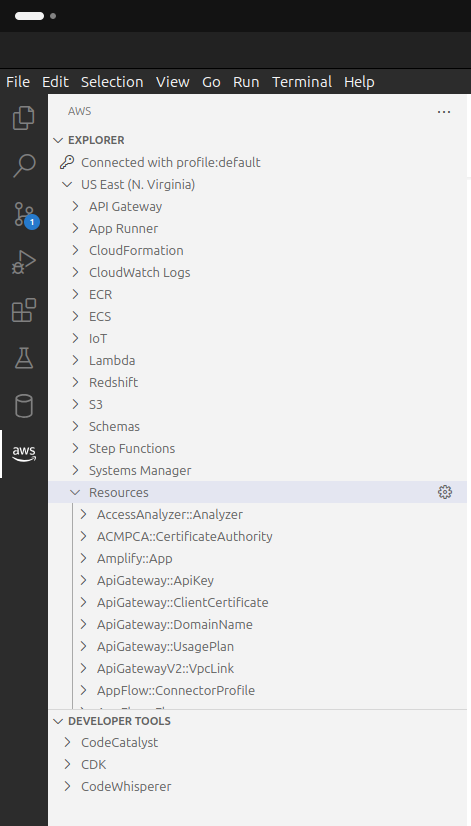

In [3]:
display.Image("aws_gui.png")

### 

# Using Visual Studio Code Remotely (FUTURE WORK)

Once the environment has been successfully deployed and tested, I can now seamlessly connect remotely to it and utilize the computing resources within the Visual Studio IDE to perform the core steps in the machine learning operations (ML Ops) life cycle. 

# Environment tear down

With the below code, the entire environment created for the project will be destroyed. When undertaken programmatically, environment destruction can be easily timestamped and photographed for compliance record keeping purposes.

According to the AWS documentation for delete_vpc method of the ec2 client, deleting a VPC programmatically works the same way is it would if I were to approach it from the AWS gui console on the aws web site. Specifically, the documentation states:

"EC2.Client.delete_vpc(**kwargs)\
*Deletes the specified VPC. You must detach or delete all gateways and resources that are associated with the VPC before you can delete it. For example, you must terminate all instances running in the VPC, delete all security groups associated with the VPC (except the default one), delete all route tables associated with the VPC (except the default one), and so on. When you delete the VPC, it deletes the VPC’s default security group, network ACL, and route table."*

https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_vpc.html

The key takeaway here is that I can completely tear the environment down in a single block of commands if I want to. In order to do that, the work will simply need to be performed *in the right order* so that the teardown can occur without any manual intervention. Specifically, these requirements indicate the following order of operations:

(1) terminate all instances running in the VPC; 
(2) delete all security groups associated with the VPC except the default security group;
(3) delete all route tables associated with the VPC except the default route table;
(4) and so on... indicating the VPC is the last thing to be deleted

While project cleanup is typically handled as an afterthought, in a highly regulated compliance environment - in which data destruction must be not only assured but documentable - being able to reliably run a teardown command in which there is design level knowledge that the environment will be destroyed has substantial value. Furthermore, by performing this task within a Jupyter notebook, I can also take advantage of our ability to knit the document into a PDF as a permanent project artifact for submission to a project manager to close out a project. 

Turnkey compliance in this fashion also potentially reduces approval barriers because the non-routine nature of environment management is overcome. In this way, setting up an entire cloud becomes as simple as a conda environment in a data science project in which each environment is not only bespoke but assumed to be isolated and expendable after the conclusion of a project. Results should be reproducible after a teardown as well.

The below blocks of code were rearranged through an iterative testing to identify the sequence and requirements to ensure that teardown was entirely programmatic and did not necessitate any use of the AWS Console GUI. 

In [60]:
read_db_results() # this is our list of items to delete

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


In [61]:
restore_global_iac_variables() # start by restoring IAC variables since this will be run presumably after the environnment is used

In [62]:
VpcId # unit test - confirms above works

'vpc-09227df9104712079'

### Terminate all instances

Before beginning the teardown of the entire network, I'll terminate all running instances:

In [63]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/terminate_instances.html

client = boto3.client("ec2")
response = client.terminate_instances(
    InstanceIds=[
        computing_instance, bastion_instance_id
    ],
    DryRun=False
)
response

{'TerminatingInstances': [{'CurrentState': {'Code': 32,
    'Name': 'shutting-down'},
   'InstanceId': 'i-0c197d81ed7f18ae4',
   'PreviousState': {'Code': 16, 'Name': 'running'}},
  {'CurrentState': {'Code': 32, 'Name': 'shutting-down'},
   'InstanceId': 'i-0b44fc72aa9be56ba',
   'PreviousState': {'Code': 16, 'Name': 'running'}}],
 'ResponseMetadata': {'RequestId': '9aae78af-85c4-4f35-9ed0-5c27ea86d395',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '9aae78af-85c4-4f35-9ed0-5c27ea86d395',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '938',
   'date': 'Sun, 17 Dec 2023 21:29:55 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Delete the efs mount target:

In [64]:
client = boto3.client("efs")
response = client.delete_mount_target(
    MountTargetId=efs_mount_target_id
)
response

{'ResponseMetadata': {'RequestId': '68614b86-fb9a-431f-ada0-612bf77704ce',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amzn-requestid': '68614b86-fb9a-431f-ada0-612bf77704ce',
   'content-type': 'application/json',
   'date': 'Sun, 17 Dec 2023 21:30:16 GMT'},
  'RetryAttempts': 0}}

Delete the efs file system - this example assumes you want to do that. If this is where project long term artifacts are stored, do not do that:

In [65]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/efs/client/delete_file_system.html
response = client.delete_file_system(
    FileSystemId=efs_file_system_id
)
response

{'ResponseMetadata': {'RequestId': 'e11750fc-5002-4073-b311-8b70ebe2b9e7',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amzn-requestid': 'e11750fc-5002-4073-b311-8b70ebe2b9e7',
   'content-type': 'application/json',
   'date': 'Sun, 17 Dec 2023 21:30:38 GMT'},
  'RetryAttempts': 0}}

Delete the public bastion instance launch template:

In [66]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_launch_template.html
response = ec2.delete_launch_template(
    DryRun=False,
    LaunchTemplateName='e90_bastion_launch_template'
)
response

{'LaunchTemplate': {'LaunchTemplateId': 'lt-0d2246882b82491a1',
  'LaunchTemplateName': 'e90_bastion_launch_template',
  'CreateTime': datetime.datetime(2023, 12, 17, 21, 24, 37, tzinfo=tzutc()),
  'CreatedBy': 'arn:aws:iam::505296053618:user/python-user',
  'DefaultVersionNumber': 1,
  'LatestVersionNumber': 1},
 'ResponseMetadata': {'RequestId': 'cca0fb40-2af1-4fd4-882a-ccf86412a5ca',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'cca0fb40-2af1-4fd4-882a-ccf86412a5ca',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'accept-encoding',
   'content-type': 'text/xml;charset=UTF-8',
   'transfer-encoding': 'chunked',
   'date': 'Sun, 17 Dec 2023 21:30:45 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Delete the launch template for the computing cluster:

In [67]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_launch_template.html
response = ec2.delete_launch_template(
    DryRun=False,
    LaunchTemplateName='comp_clus_lt'
)
response

{'LaunchTemplate': {'LaunchTemplateId': 'lt-019e6498e8d5f273f',
  'LaunchTemplateName': 'comp_clus_lt',
  'CreateTime': datetime.datetime(2023, 12, 17, 21, 27, 36, tzinfo=tzutc()),
  'CreatedBy': 'arn:aws:iam::505296053618:user/python-user',
  'DefaultVersionNumber': 1,
  'LatestVersionNumber': 1},
 'ResponseMetadata': {'RequestId': '83f4ac67-cd23-4908-b63c-d7a6e32d0a25',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '83f4ac67-cd23-4908-b63c-d7a6e32d0a25',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'accept-encoding',
   'content-type': 'text/xml;charset=UTF-8',
   'transfer-encoding': 'chunked',
   'date': 'Sun, 17 Dec 2023 21:30:49 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

### Delete security groups

First, the bastion host security group will be deleted. Note that this cannot be deleted while the bastion host instance is in the process of terminating - so some waiting is required but not more than 2 or 3 minutes:

In [68]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_security_group.html
response = ec2.delete_security_group(
    GroupId=public_security_group_id,
    DryRun=False
)
response

{'ResponseMetadata': {'RequestId': '7249162d-71d2-40db-b672-6e12c8d36a58',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '7249162d-71d2-40db-b672-6e12c8d36a58',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '239',
   'date': 'Sun, 17 Dec 2023 21:30:52 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Next, the private subnet computing cluster security group will be deleted:

In [69]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_security_group.html
response = ec2.delete_security_group(
    GroupId=private_security_group_id,
    DryRun=False
)
response

{'ResponseMetadata': {'RequestId': '369ca32e-2a0a-4b2b-b9b1-0c992f6eca45',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '369ca32e-2a0a-4b2b-b9b1-0c992f6eca45',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '239',
   'date': 'Sun, 17 Dec 2023 21:30:57 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

## Network teardown

Performing the teardown on this section requires removing the elastic IP addresses first before the route tables. Then route tables can be purged. At first, when I attempted to do this, I thought that I should disassociate and / or delete the elastic IP address directly. However, since I attached the elastic IP address to my NAT gateway, I needed to delete this. It turns out that deleting the NAT gateway automatically releases the elastic IP address. However, I had to improve the script above to release all of the elastic IP addresses I had used in current and prior runs before I could delete the internet gateway:

### Delete NAT gateway:

In [70]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_nat_gateway.html#EC2.Client.delete_nat_gateway
response = ec2.delete_nat_gateway(DryRun=False, 
                                  NatGatewayId=nat_gateway)
response

{'NatGatewayId': 'nat-03a9451b9ad3f3bc5',
 'ResponseMetadata': {'RequestId': '8f43274b-9cd9-414d-9ccb-941cf8f1a9df',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '8f43274b-9cd9-414d-9ccb-941cf8f1a9df',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'accept-encoding',
   'content-type': 'text/xml;charset=UTF-8',
   'transfer-encoding': 'chunked',
   'date': 'Sun, 17 Dec 2023 21:31:31 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

The NAT gateway elastic IP is released:

In [72]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/release_address.html
response = ec2.release_address(
    AllocationId=natgw_eip,
    DryRun=False
)
response

{'ResponseMetadata': {'RequestId': '74873841-0395-4cf7-a78d-431d09055962',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '74873841-0395-4cf7-a78d-431d09055962',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '229',
   'date': 'Sun, 17 Dec 2023 21:32:38 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

All remaining elastic IP addresses are released:

In [73]:
response = ec2.describe_addresses(
   
    DryRun=False
)
response

{'Addresses': [],
 'ResponseMetadata': {'RequestId': '45f29e20-b17a-4f2b-b331-911b59bafafe',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '45f29e20-b17a-4f2b-b331-911b59bafafe',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '228',
   'date': 'Sun, 17 Dec 2023 21:32:42 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

In [74]:
for i in response['Addresses']:
    # https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/release_address.html
    response = ec2.release_address(
        AllocationId=i['AllocationId']
    )
    print(response)

### Delete internet gateway:

Next, I'll delete the internet gateway. According to the documentation, I need to first detach the internet gateway from the VPC before I can delete it:

In [75]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/vpc/detach_internet_gateway.html
response = ec2.detach_internet_gateway(
    DryRun=False,
    InternetGatewayId=internet_gateway_id,
    VpcId = VpcId
)
response

{'ResponseMetadata': {'RequestId': '40072fa3-0e93-4bc6-b43e-e641f1f0f4fe',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '40072fa3-0e93-4bc6-b43e-e641f1f0f4fe',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '243',
   'date': 'Sun, 17 Dec 2023 21:32:57 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

In [76]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_internet_gateway.html
response = ec2.delete_internet_gateway(DryRun=False, InternetGatewayId=internet_gateway_id)
response

{'ResponseMetadata': {'RequestId': '64ef9a8f-1328-499e-ab86-8a929fa29c10',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '64ef9a8f-1328-499e-ab86-8a929fa29c10',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '243',
   'date': 'Sun, 17 Dec 2023 21:33:00 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

### Delete Route Tables

The only route table that needs to specifically be deleted is the one for the public subnet for the bastion host. The reason for this is that the private subnet was the route table that went with the default VPC route table - which will be deleted along with the VPC when it is deleted. To accomplish this, the association ID for the public route table for this project needs to be programmatically retrieved and then used to disassociate the route table from the subnet before deleting it.

In [77]:
response = ec2.describe_route_tables()

In [78]:
read_db_results()

,field,value
0,VpcId,vpc-09227df9104712079
1,public_subnet_id,subnet-097eeb8c19ed55f79
2,private_subnet_id,subnet-0cacf4f9a5a4c0f9c
3,nat_gateway,nat-03a9451b9ad3f3bc5
4,internet_gateway_id,igw-0bce767c5b3cf79a4
5,natgw_eip,eipalloc-0c90677192f18ecda
6,public_route_table,rtb-0ea6c45dba6b8b2d6
7,public_security_group_id,sg-06ea16a07eb29c3cb
8,private_security_group_id,sg-0ae14877a4a05a090
9,kms_key_id,mrk-f1c124f211fa4432a346cabf82e4a8c3


In [79]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/disassociate_route_table.html
for i in range(len(response['RouteTables'])):
    #print(response['RouteTables'][i]['Associations'][0]['RouteTableId'])
    if response['RouteTables'][i]['Associations'][0]['RouteTableId'] == public_route_table:
        rt_tble_assoc_tmp = response['RouteTables'][i]['Associations'][0]['RouteTableAssociationId']
        resp = ec2.disassociate_route_table(DryRun=False, AssociationId=rt_tble_assoc_tmp)
        print(resp)

{'ResponseMetadata': {'RequestId': 'e9846b1f-fb60-4a30-a142-32148eff81f2', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'e9846b1f-fb60-4a30-a142-32148eff81f2', 'cache-control': 'no-cache, no-store', 'strict-transport-security': 'max-age=31536000; includeSubDomains', 'content-type': 'text/xml;charset=UTF-8', 'content-length': '330', 'date': 'Sun, 17 Dec 2023 21:33:26 GMT', 'server': 'AmazonEC2'}, 'RetryAttempts': 0}}


Next, I delete the public route table for the VPC since this is the only route table with an explicit association:

In [80]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_route_table.html
response = ec2.delete_route_table(
    DryRun=False,
    RouteTableId=public_route_table	
)
response

{'ResponseMetadata': {'RequestId': 'fbf53a88-ace1-434f-8f8a-9906bc857563',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'fbf53a88-ace1-434f-8f8a-9906bc857563',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '233',
   'date': 'Sun, 17 Dec 2023 21:33:30 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

The below will conditionally delete all of the subnets built for this project within the VPC for this project:

In [81]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_subnet.html
response = ec2.describe_subnets()
for s_net in range(len(response['Subnets'])):
    if response['Subnets'][s_net]['VpcId'] == VpcId:
        sn_id = response['Subnets'][s_net]['SubnetId']
        ec2.delete_subnet(SubnetId=sn_id)
        
response

{'Subnets': [{'AvailabilityZone': 'us-east-1a',
   'AvailabilityZoneId': 'use1-az4',
   'AvailableIpAddressCount': 4091,
   'CidrBlock': '172.31.16.0/20',
   'DefaultForAz': True,
   'MapPublicIpOnLaunch': True,
   'MapCustomerOwnedIpOnLaunch': False,
   'State': 'available',
   'SubnetId': 'subnet-0766dbcad272e1fa7',
   'VpcId': 'vpc-024db06ce583b88e9',
   'OwnerId': '505296053618',
   'AssignIpv6AddressOnCreation': False,
   'Ipv6CidrBlockAssociationSet': [],
   'Tags': [{'Key': 'Name', 'Value': 'Default_Subnet'}],
   'SubnetArn': 'arn:aws:ec2:us-east-1:505296053618:subnet/subnet-0766dbcad272e1fa7',
   'EnableDns64': False,
   'Ipv6Native': False,
   'PrivateDnsNameOptionsOnLaunch': {'HostnameType': 'ip-name',
    'EnableResourceNameDnsARecord': False,
    'EnableResourceNameDnsAAAARecord': False}},
  {'AvailabilityZone': 'us-east-1a',
   'AvailabilityZoneId': 'use1-az4',
   'AvailableIpAddressCount': 251,
   'CidrBlock': '10.0.1.0/24',
   'DefaultForAz': False,
   'MapPublicIpOnLaun

Last, I delete the VPC to conclude the teardown of the VPC centric part of the architecture:

In [82]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2/client/delete_vpc.html
ec2.delete_vpc(VpcId=VpcId)

{'ResponseMetadata': {'RequestId': 'f61adcef-23c9-45b3-9957-b28624673540',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'f61adcef-23c9-45b3-9957-b28624673540',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '219',
   'date': 'Sun, 17 Dec 2023 21:33:51 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Delete KMS encryption keys:

In [83]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/kms/client/schedule_key_deletion.html#
client = boto3.client("kms")

response = client.schedule_key_deletion(
    KeyId=kms_key_id
,
PendingWindowInDays=7
)
response

{'KeyId': 'arn:aws:kms:us-east-1:505296053618:key/mrk-f1c124f211fa4432a346cabf82e4a8c3',
 'DeletionDate': datetime.datetime(2023, 12, 24, 16, 34, 12, 277000, tzinfo=tzlocal()),
 'KeyState': 'PendingDeletion',
 'PendingWindowInDays': 7,
 'ResponseMetadata': {'RequestId': 'baebd5b2-b82b-4d62-b333-72260b36363d',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'baebd5b2-b82b-4d62-b333-72260b36363d',
   'cache-control': 'no-cache, no-store, must-revalidate, private',
   'expires': '0',
   'pragma': 'no-cache',
   'date': 'Sun, 17 Dec 2023 21:34:12 GMT',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '172',
   'connection': 'keep-alive'},
  'RetryAttempts': 0}}

### Delete IAC database

Since the IAC sqlite database used for this project no longer contains useful configuration references after the project is completed, I delete it below:

In [84]:
import os
os.remove('configs.db')

# Print Report

The terminus of a typical data science modeling project is to print a Jupyter notebook report out in a PDF to memorialize the results, as well as better ensure the reproducibilty of the entire process (typically be rerunning the workbook once more all the way through). In this case, the use of this typical method oriented towards scientific reproducibility of results from the data science community provides superior transparency and quality assurance for industrial infrastructure as code applications. Furthermore, unlike a typical code base, a Jupyter notebook is meant to be filled with text (via markdown) to provide the thought process of the author right along side the code, and the results of running that code in Jupyter notebook cells - which are persisted in this type of printout:

In [85]:
import os
os.listdir()

['Proposal.pdf',
 'Final Project Assignment.pdf',
 '.~lock.Adam Brzozowski E90 Final Project.pptx#',
 'CSCI E-90 Final Project.pdf',
 'Adam Brzozowski E90 Final Project.pptx',
 'generic_aws_cli_env.yml',
 'aws_gui.png',
 'CSCI E-90 Final Project.ipynb',
 'junkyard.ipynb',
 'CSCI E90 Final Project Proposal - Adam Brzozowski.docx']

Below are some Linux commands you may need to install the requisite libraries on your system. These are for debian based Linux distros but you can find more details for your respective operating system. Furthermore, if you are unsure how to get this to work, you can try running the nbconvert command and following the prompts to identify the missing dependencies -vpotentially easier than an open ended search. 

In [ ]:
!sudo apt-get install texlive

In [ ]:
!sudo apt-get install pandoc

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [86]:
!jupyter nbconvert 'CSCI E-90 Final Project.ipynb' --to pdf

[NbConvertApp] Converting notebook CSCI E-90 Final Project.ipynb to pdf
[NbConvertApp] Support files will be in CSCI E-90 Final Project_files/
[NbConvertApp] Making directory ./CSCI E-90 Final Project_files
[NbConvertApp] Writing 216199 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 478468 bytes to CSCI E-90 Final Project.pdf


# Future work

The approach of creating a data scientist friendly, repeatable way of calling up and tearing down useful data science infrastructure on the AWS cloud shows data scientists that infrastructure can be treated as a programming task along with modeling and data analysis. A typical data scientist will develop their own patterns for doing data science to increase the speed and effectiveness of doing their job. With the completion of this project, I have built a repeatable way to deploy a secure private cloud for performing data science tasks. There are a few obvious avenues through which I can build on this for future work;

(1) Develop a refactored methodology that abstracts this entire process into something more like the CDK - except with customized Python classes and methods that provide templates that precisely match my typical use cases. Even if the end product doesn't exactly match everyone else's use cases, this work may serve as a useful model for curriculuar oriented materials in training programs. Right now, a big barrier to an IAC first approach is the perceived difficulty (despite being easier) because this approach involves code. Demonstrating how easy this is, and how much less time and effort it takes, can be further enhanced with dedicated training materials;

(2) Develop an accompanying refactored Jupyter notebook that thoroughly explains all of the custom developed AWS SDK classes as part of a holistic effort to build up a GitHub repository and possibly a PyPi / Anaconda library to support ease of use for others;

(3) Continue to develop use cases and requirements through engagement within the healthcare and other sectors in pursuit of greater programmatic abstraction around pattern use cases;

(4) Showcase and highlight seamless use of the cloud in more data science contexts to continue to socialize the idea that data scientists should backward integrate with infrastructure and security teams by leveraging meaningful programming expertise in conjunction with skils training in these areas;

(5) Develop and incorporate ways to effectively evaluate each pattern scenario systematically with automated security analysis for rapid commissioning

# References

In order to make use of the capabilities of a fully functional IDE, while simultaneously having all of the advantages of the cloud, it's necessary to connect via SSH to the ec2 computing cluster from Visual Studio. This demo shows how that can be accomplished:
https://medium.com/@christyjacob4/using-vscode-remotely-on-an-ec2-instance-7822c4032cff


This next demo shows how to connect from a bastion instance to a private instance after setting up an environment using a Terraform script:
https://towardsdatascience.com/connecting-to-an-ec2-instance-in-a-private-subnet-on-aws-38a3b86f58fb


["Werner Vogels on the AWS Cloud Development Kit (AWS CDK)"](https://www.youtube.com/embed/AYYTrDaEwLs)

One of the key inspirations for this notebook is this talk by Werner Vogels - CTO of Amazon Web Services (AWS). In the talk, he provides a compelling vision of how infrastructure as code needed to grow beyond declarative syntaxes like yaml into libraries for core programming languages - thereby providing typical control flow type functionality for deploying infrastructure.

In [ ]:
display.HTML('"<iframe width="400" height="250" src="https://www.youtube.com/embed/AYYTrDaEwLs" title="Werner Vogels on the AWS Cloud Development Kit (AWS CDK)" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>"')

Additionally, I found this [example](https://www.youtube.com/watch?v=lOH4YnaVyvA) - which makes use of a higher level framework called the AWS CDK - inspiring and compelling for a future in which data scientists roll their own infrastructure as well:

In [67]:
display.HTML('<iframe width="400" height="250" src="https://www.youtube.com/embed/lOH4YnaVyvA" title="CSCIE-90 AWS-CDK Short Presentation" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

/home/adam/anaconda3/envs/generic_aws_cli_env/lib/python3.12/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


*AWS whitepaper on HIPPA / HITECH architecture:*

Amazon Web Services has a [whitepaper](https://docs.aws.amazon.com/pdfs/whitepapers/latest/architecting-hipaa-security-and-compliance-on-aws/architecting-hipaa-security-and-compliance-on-aws.pdf) on the topic of architecting HIPAA compliance.

"Advanced" Sagemaker notebook demo - which turns out to be ec2 plus a few more handy features:
https://youtu.be/X5CLunIzj3U